<a href="https://colab.research.google.com/github/Carlys222/ESTAD-STICA-2/blob/main/EXAMEN_PRACTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/ESTAD-STICA-2/refs/heads/main/data%20(1).csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


coeficiente de correlacion:  0.9227

coeficiente de determinacion:  0.8514

intervalo de confianza para b1 de  98%
 5.2890 < b1 <  6.1729
             df        sum_sq       mean_sq           F        PR(>F)
Duration    1.0  9.847530e+06  9.847530e+06  928.219489  5.795220e-69
Residual  162.0  1.718667e+06  1.060905e+04         NaN           NaN
 valor_p Test de shapiro:  0.0000

Valor_p de Breusch-Pagan:  0.0000



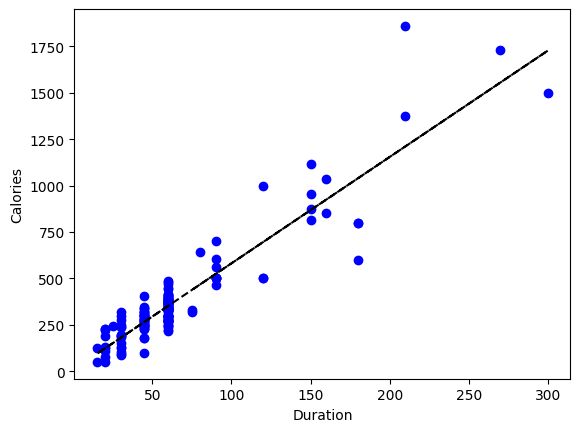

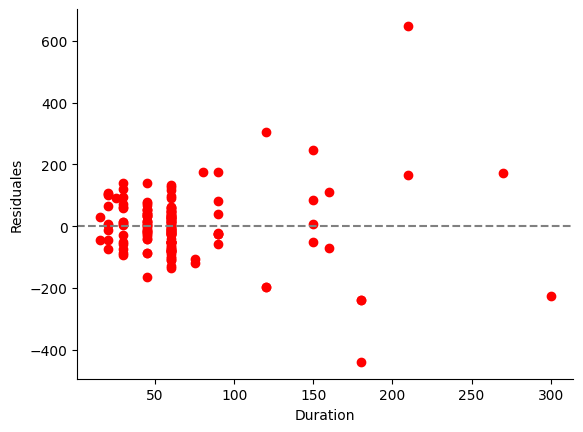

In [81]:
# a) Establesca una variable dependiente ( Y ) y una variable independiente ( X ).

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/ESTAD-STICA-2/refs/heads/main/data%20(1).csv')
# eliminar registros  cpn valores faltantes
df.dropna(inplace=True)

X = df["Duration"] # Variable independiente
Y = df["Calories"] # Variable dependiente

# b) Realiza un gráfico con la dispersión y la recta de regresión ajustada.
plt.scatter(X, Y, color = 'blue')
plt.xlabel('Duration')
plt.ylabel('Calories')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Recta de regresion lineal
import statsmodels.api as sm
X_constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_constante).fit()

b0, b1 = modelo.params

Fun = lambda X: b0 + b1 * X

Yc = Fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--')
# c) Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
from scipy.stats import pearsonr
r,_ = pearsonr(X, Y)
print(f'coeficiente de correlacion: {r: 0.4f}\n')
print(f'coeficiente de determinacion: {r ** 2: 0.4f}\n')

# d) Obtén un intervalo de confianza de 98% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.
nivel_de_confianza = 0.98
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}')

# Tabla ANOVA
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('Calories ~ Duration', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
print(tabla_anova)

# e) Verifica los supuestos.
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'red')
plt.xlabel('Duration')
plt.ylabel('Residuales')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f' valor_p Test de shapiro: {valor_p_sh: 0.4f}\n')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_constante)
print(f'Valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

